In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
DATASET='20'

In [3]:
seq = get_standardized_measures(f'results/sequential_{DATASET}.csv')
seq_time_tot = seq['TOTAL'].mean()
seq_time_freq = seq['FREQCALC'].mean()

In [4]:
data = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [5]:
data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,WRITE,TOTAL
0,1,25495802,752474252,220056,2324186873,189611302,3291988285
1,1,25708117,762238506,219369,2330198506,199276118,3317640616
2,6,25133802,239348245,222052,1259792018,182909356,1707405473
3,6,25893441,234058280,222405,1248568715,199630214,1708373055
4,11,25337802,280723889,257821,1451533018,203081530,1960934060
5,11,25567955,275648141,221120,1430316705,198934852,1930688773
6,16,25490265,309232884,189209,1558983564,189934476,2083830398
7,16,25683020,296815557,193280,1554085497,187656114,2064433468


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

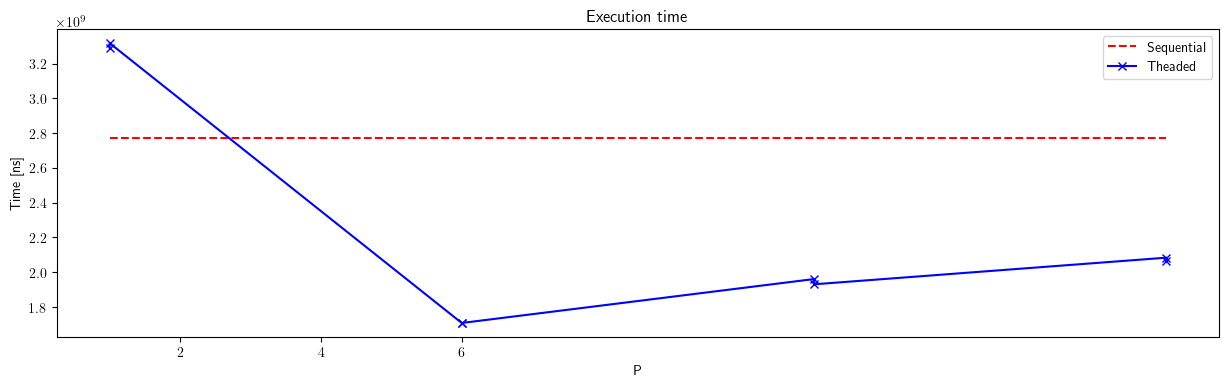

In [7]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [8]:
import pandas as pd

In [9]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).median()

In [10]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,WRITE,TOTAL
0,1,25601959.5,757356379.0,219712.5,2.327193e+09,194443710.0,3.304814e+09
1,6,25513621.5,236703262.5,222228.5,1.254180e+09,191269785.0,1.707889e+09
2,11,25452878.5,278186015.0,239470.5,1.440925e+09,201008191.0,1.945811e+09
3,16,25586642.5,303024220.5,191244.5,1.556535e+09,188795295.0,2.074132e+09


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [11]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [12]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,WRITE,TOTAL,S_p
0,1,25601959.5,757356379.0,219712.5,2.327193e+09,194443710.0,3.304814e+09,0.838489
1,6,25513621.5,236703262.5,222228.5,1.254180e+09,191269785.0,1.707889e+09,1.622501
2,11,25452878.5,278186015.0,239470.5,1.440925e+09,201008191.0,1.945811e+09,1.424111
3,16,25586642.5,303024220.5,191244.5,1.556535e+09,188795295.0,2.074132e+09,1.336005


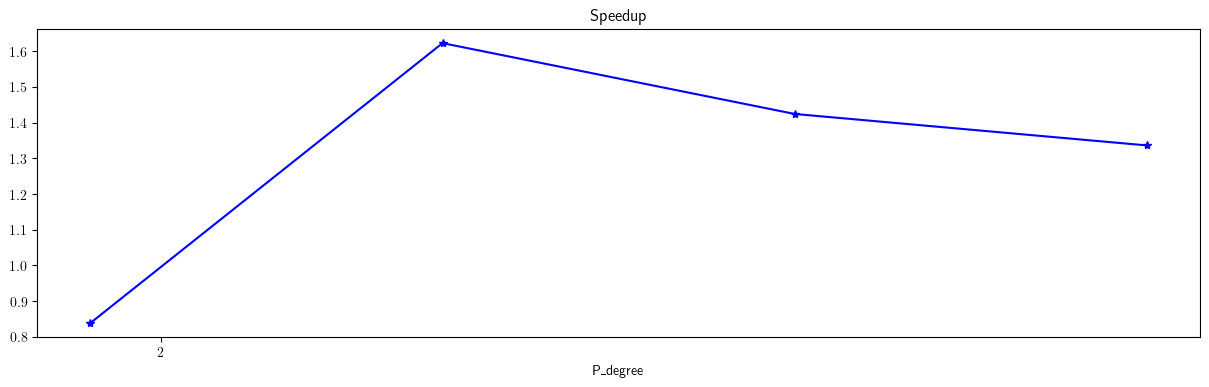

In [13]:
# plot results
plt.figure(figsize=(15,4))
plt.title("Speedup")
plt.xlabel('P_{degree}')
plt.xticks(range(0, len(sp_data), 2))

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], '*-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [14]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    3.304814e+09
Name: TOTAL, dtype: float64

In [15]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


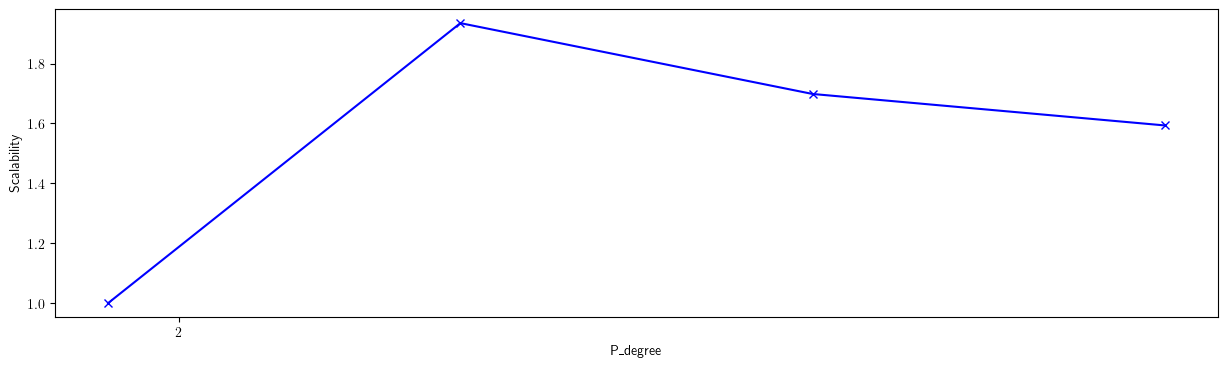

In [16]:
# plot results
plt.figure(figsize=(15,4))
plt.xticks(range(0, len(sp_data), 2))
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')